In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import skimage.draw
import numpy as np
from tqdm import tqdm
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


'''Structure dataset in two folders'''

def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
label_map = {'Epithelial':1,
             'Lymphocyte':2,
             'Macrophage':4,
             'Neutrophil':3,
            }


# Root directory of the project
ROOT_DIR = os.path.abspath(".")

# Training file directory
#DATASET = os.path.join(ROOT_DIR, "dataset", "MURA-v1.1/")
#FOLDER = os.path.join(ROOT_DIR, "dataset")
#PATH = DATASET
#print(PATH)

In [2]:
def read_nuclei(path):
    "Read raw data"

    # Load 4-channel image
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    

(1170, 1090, 3)
uint8


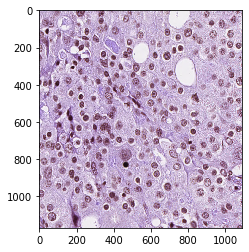

In [3]:
image = read_nuclei("x.tif")
print(image.shape)
print(image.dtype)
plt.imshow(image)

In [4]:
image[150,150]

array([159, 127, 166], dtype=uint8)

In [5]:
image[:,:,0]

array([[218, 219, 214, ..., 213, 201, 174],
       [213, 216, 216, ..., 211, 193, 168],
       [204, 210, 216, ..., 205, 187, 167],
       ...,
       [180, 174, 166, ..., 140, 133, 138],
       [182, 173, 161, ..., 135, 135, 146],
       [175, 166, 155, ..., 130, 135, 139]], dtype=uint8)

In [6]:
image[:,:,3] # yes!

IndexError: index 3 is out of bounds for axis 2 with size 3

In [7]:
image[:,:,:3].shape

(1170, 1090, 3)

(1170, 1090)
float64


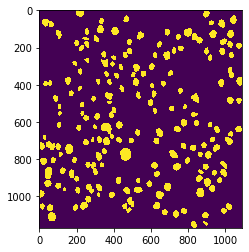

In [8]:
y_ep = read_nuclei("y_ep.tif")
print(y_ep.shape)
print(y_ep.dtype)
plt.imshow(y_ep)

In [9]:
val = y_ep.flatten()
max(val)

np.unique(val)

array([  0., 255.])

In [10]:
test = np.where(y_ep==255.0, 1.0, y_ep) 
test.shape

(1170, 1090)

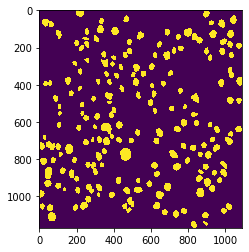

In [11]:
plt.imshow(test)

In [12]:
val = test.flatten()
max(val)

np.unique(val)

array([0., 1.])

In [13]:
test.dtype

dtype('float64')

(1170, 1090)
float64


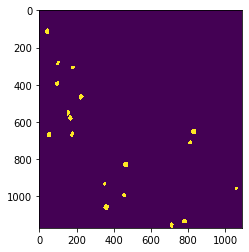

In [14]:
y_ly = read_nuclei("y_ly.tif")
print(y_ly.shape)
print(y_ly.dtype)
plt.imshow(y_ly)

In [15]:
val = y_ly.flatten()
max(val)

np.unique(val)

array([  0., 255.])

In [16]:
test2 = np.where(y_ly==255.0, 2.0, y_ly) 
test2.shape

(1170, 1090)

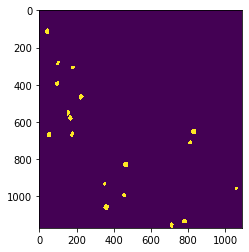

In [17]:
plt.imshow(test2)

In [18]:
val = test2.flatten()
max(val)

np.unique(val)

array([0., 2.])

In [19]:
test2.dtype

dtype('float64')

In [20]:
# overlay two masks

mask = np.maximum(test, test2)
mask.shape

(1170, 1090)

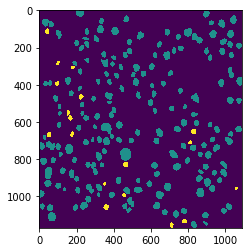

In [21]:
plt.imshow(mask)

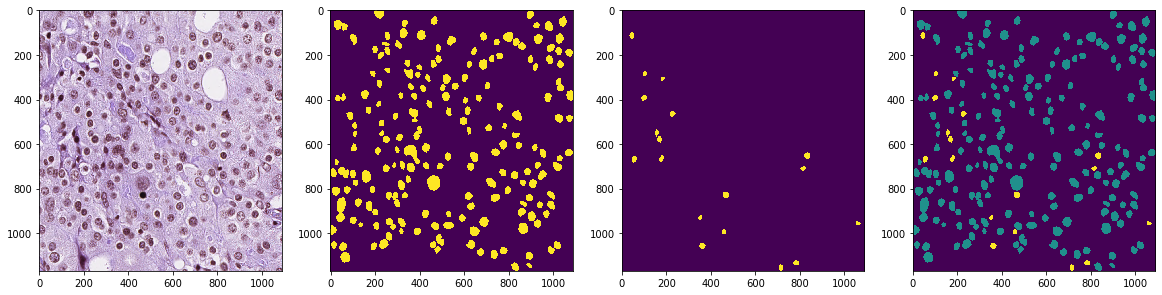

In [22]:
f, axarr = plt.subplots(1,4, figsize=(20,20))

axarr[0].imshow(image)
axarr[1].imshow(test)
axarr[2].imshow(test2)
axarr[3].imshow(mask)

In [23]:
np.unique(mask)

array([0., 1., 2.])

In [24]:
#def process(img):
#    plt.figure(figsize=(8,8))
#    plt.imshow(img)
    
#images = [image, mask]
#for file in images:
#    process(file)

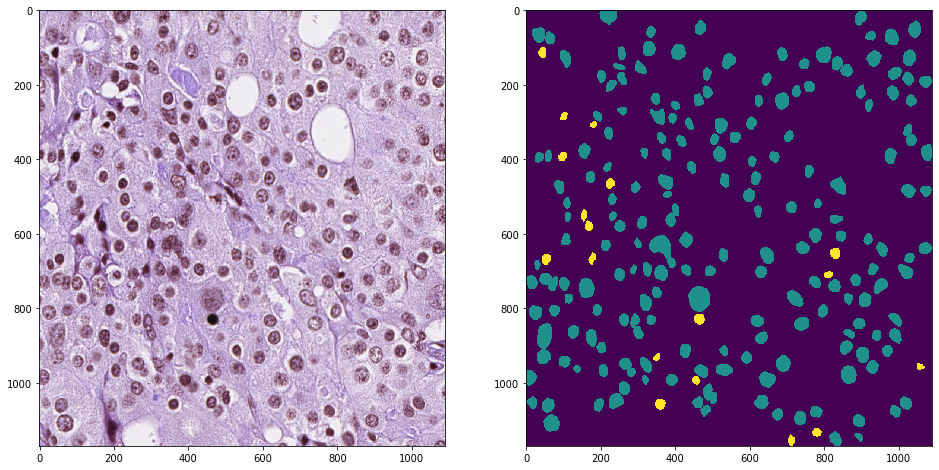

In [25]:
f, axarr = plt.subplots(1,2, figsize=(16,16))

axarr[0].imshow(image)
axarr[1].imshow(mask)